# Google Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


## Data Preprocessing

In [14]:
training_set = data_train.iloc[:,1:2].values

In [17]:
training_set.shape

(1258, 1)

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
training_set_scaled = scaler.fit_transform(training_set)

In [18]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

In [19]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [20]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [23]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

## Building RNN

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))

In [26]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0035
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0030
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0030
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0027
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0029
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0029
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0029
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0026
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013


## Making Predictions and Visulalizing the Results

In [30]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = data_test.iloc[:,1:2].values

In [31]:
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)

In [37]:
inputs = data_total[len(data_total)-len(data_test)-60:].values

In [38]:
inputs = inputs.reshape(-1,1)

In [40]:
inputs = scaler.transform(inputs)

In [42]:
inputs.shape

(80, 1)

In [43]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [44]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(20, 60, 1)

In [45]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

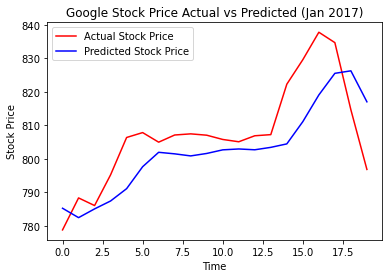

In [49]:
# Visualising the Results
plt.plot(actual_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title("Google Stock Price Actual vs Predicted (Jan 2017)")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()